## **Introduction**

**Name: Carlos González Carballo**

**Subject: Artificial Intelligence System**

This project aims to develop a tool for detecting airplanes in images taken by satellites using Artificial Intelligence.

Page containing different databases of images taken by satellite: https://www.grss-ieee.org/

Airbus Aircraft Detection database: https://eod-grss-ieee.com/dataset-detail/OGxuL0dwUGt6TzljN1ZCWHZuaER6QT09

Download page for the Airbus Aircraft Detection database: https://www.kaggle.com/datasets/airbusgeo/airbus-aircrafts-sample-dataset

The downloaded Database contains several folders and files of interest, among which the following are noteworthy.

* /archive/README.md: which contains relevant information about the Database.

* /archive/images/: a folder that includes 103 images of 2560x2560 pixels.

* /archive/extras/: an additional folder that contains another 6 images of the same dimensions.

* /archive/annotations.csv: we have a labeled database, where in this file, the position of boundary boxes surrounding all the airplanes seen in the /archive/images/ folder is found.

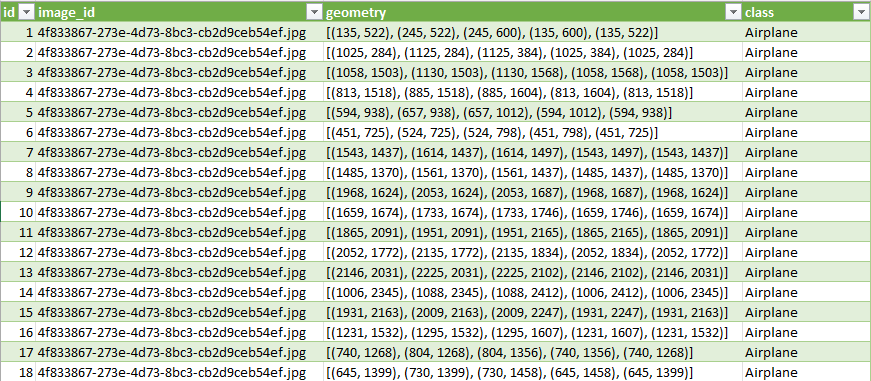

This database has the following attributes: image_id (name of each image found in the /archive/images/), geometry (referring to the boundary boxes surrounding each airplane), and class (which identifies whether what is captured is an Airplane or a Truncated Airplane, the latter case being if the captured airplane extends beyond the dimensions of the images).

Therefore, each line refers to the positions of the boundary boxes of 1 airplane, so if we have N Airplanes (and/or Truncated Airplanes) in the image 'img_name.jpg', there will be N lines referring to those N airplanes

# **Conecting to Google drive**

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
path = '/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/'
# path = '/content/drive/MyDrive/TFM/Code/AirbusAircraft/'

Mounted at /content/drive


In [ ]:
import shutil
shutil.rmtree('/content/sample_data')
# shutil.rmtree('/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO')

## Eliminate unnecesary folders in this workspace

## Bring here to this folder the necessary python scripts

In [ ]:
def copy_files(source, destination_folder):
    """
    Copies files from source to destination_folder.
    If source is a directory, copies all files from it.
    If source is a file, copies just that file.
    """
    # Check if the destination folder exists, if not, create it
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Check if source is a directory or a file
    if os.path.isdir(source):
        # If source is a directory, list and copy all files
        files = [file for file in os.listdir(source) if os.path.isfile(os.path.join(source, file))]
        for file in files:
            source_path = os.path.join(source, file)
            destination_path = os.path.join(destination_folder, file)
            shutil.copy(source_path, destination_path)
    elif os.path.isfile(source):
        # If source is a file, copy the file
        destination_path = os.path.join(destination_folder, os.path.basename(source))
        shutil.copy(source, destination_path)
    else:
        print(f"The source {source} is not a valid file or directory.")

copy_files('/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/util_preparing_dataset.py', '/content')
copy_files('/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/util_YOLO.py', '/content')
# copy_files('/content/drive/MyDrive/TFM/Code/AirbusAircraft/util_preparing_dataset.py', '/content')
# copy_files('/content/drive/MyDrive/TFM/Code/AirbusAircraft/util_YOLO.py', '/content')

# **Import functions from utils_dataset**

In [ ]:
from util_preparing_dataset import split_database, extract_image_name
from util_YOLO import  (build_YOLO_folders, crop_image, filter_points, calculate_area_bboxes, yolo_to_rectangle,
                        config_YOLO_file, label_img, YOLO_dividing_image, label_img_val_test,
                        config_YOLO_file_truncated_airplane, label_img_truncated_airplane, YOLO_dividing_image_truncated_airplane,
                        label_img_val_test_truncated_airplane)

# **Train, valid and test folders**

As is well known in Artificial Intelligence, data must be divided between training and testing, generally allocating between 70% for train, 10% for validation and 20% for test

In [ ]:
original_path = path+'archive/images'
final_path = path+'archive'


In [ ]:
split_database(original_path, final_path, 0.7,0.2,0.1)

## TRAIN ##
3e321b8a-9504-45aa-82b4-16158e28e290.jpg
77f7b57f-5cf2-424d-a952-9847b3c3f35e.jpg
f82d64a6-3bfa-4612-bcbd-847a7d89c296.jpg
22291e0b-ebe2-4f3f-b53e-4e709179300a.jpg
dce20c6a-d661-4258-9c58-5507f38ce97e.jpg
29324dbf-6043-4521-bd83-44a97ffc5281.jpg
56765c5f-0922-43b3-8d58-bf2bf5a1e727.jpg
0641acc3-c0b9-4f9d-b0ba-7ad18aa08864.jpg
ef8ff443-e09b-405d-a432-3b5bde0a278b.jpg
54b4e42b-3667-4564-b8fa-c23122ca54d5.jpg
e18dde99-6efd-4c6a-8fd3-343e8a393cd8.jpg
ae2fddcd-a2b4-4f32-b86d-ac2c2b03d77d.jpg
38ff8d64-3460-4f83-bf9c-383832aeba0d.jpg
534ba32c-cde2-402b-9b47-1396cf0999e8.jpg
03f84930-e2be-4c19-9afc-0dc26d02538e.jpg
4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg
dacabde6-c8a7-475b-ab26-81b4e4dd5977.jpg
6627e7c7-2fdd-4f3c-965e-b4d73d0a4cc2.jpg
980b5831-43b7-4adb-9e4b-67d6cff3ef68.jpg
78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg
d0c3d270-f23e-4792-bac0-142a9cc8ccc6.jpg
cbd51501-ed0f-411c-b472-df4357cca40c.jpg
ef92f434-c41b-4423-9218-4514c49f00c6.jpg
58956bcc-11fc-4357-8d75-32fee9feaf07.jpg
3da0

# **Crop image**

In [ ]:
# basic python and ML Libraries
import os
import random
import numpy as np
import pandas as pd
import ast
import math
import cv2
import shutil
from PIL import Image, ImageDraw, ImageFont

#**Working with the data**

In [ ]:
df = pd.read_csv(path+'archive/annotations.csv')
df.head(5)

,id,image_id,geometry,class
0,1,4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg,"[(135, 522), (245, 522), (245, 600), (135, 600...",Airplane
1,2,4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg,"[(1025, 284), (1125, 284), (1125, 384), (1025,...",Airplane
2,3,4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg,"[(1058, 1503), (1130, 1503), (1130, 1568), (10...",Airplane
3,4,4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg,"[(813, 1518), (885, 1518), (885, 1604), (813, ...",Airplane
4,5,4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg,"[(594, 938), (657, 938), (657, 1012), (594, 10...",Airplane


## Extracting the name of all the images

In [ ]:
folder_train = path + 'archive/train'
folder_valid = path + 'archive/valid'
folder_test = path + 'archive/test'

files_train = extract_image_name(folder_train)
files_valid = extract_image_name(folder_valid)
files_test = extract_image_name(folder_test)
print(f'Train, {len(files_train)} files: {files_train}')
print(f'Valid, {len(files_valid)} files: {files_valid}')
print(f'Test, {len(files_test)} files: {files_test}')

Train, 93 files: ['7c2da441-819f-4ddd-8293-f4be5213d69e.jpg', '57af3c0a-b5ae-4e4f-a7f9-6856be2f80e5.jpg', '22457f2e-a740-4719-9512-056749695281.jpg', '5f726a3d-9876-498f-90c5-9f9efae06c6a.jpg', 'ae2fddcd-a2b4-4f32-b86d-ac2c2b03d77d.jpg', 'c20b3c21-a6e9-46f7-8536-d4f92574e111.jpg', '56e2d3d3-6b16-401f-a300-847272373df5.jpg', '3da0b873-fdde-4faf-9a85-021248c7dacf.jpg', '78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg', '48ef8e15-a43c-406b-9d3c-e815164b96d1.jpg', 'ecfe7982-05e5-435f-824b-e24b6846316e.jpg', '8df07836-4606-446e-9880-6ed9e0f74543.jpg', 'd8873734-016a-4b9d-9b9e-8bc47eb13fef.jpg', '1e7e0450-6eb3-479e-88c2-990abc8207fa.jpg', 'ca7b1077-0d37-4ada-9d56-0e66f864935e.jpg', '4a0821b7-3689-4b0e-9397-389254ea9a32.jpg', '140d04fd-dea7-4d46-bce2-e20f73e155da.jpg', '980b5831-43b7-4adb-9e4b-67d6cff3ef68.jpg', 'fc06c595-7905-46c3-91c0-daf56af0f926.jpg', '4e9164aa-532e-4b76-bce4-060b090da357.jpg', 'd3d2b706-9017-41f4-b57e-469038daa634.jpg', '4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg', '996ba764-cd2a

## Understanding the idea of dividing the image

Como YOLO solo trabaja con imagenes de como maximo de 640x640 pixeles, vamos a hacer subdivisiones de la imagen en 512x512. Se ha escogido esta división de 512x512, ya que es una imagen cuadrada y es un multiplo de 2560x2560, donde ambas imagenes son potencias de 2.

De esta manera obtenemos en el eje horizontal 5 divisiones y en el vertical 5 divisiones también, de esta manera obtenemos un total de 25 imagenes.

In this section, the goal is to divide a 2560x2560 pixel image into sub-images of 256x256 pixels. We aim to store these images in a folder for subsequent use in the YOLO detection algorithm.

Therefore, we want to transform the image from the original format (as shown on the left) to the subdivided format (as depicted on the right). Additionally, each sub-image will be numbered sequentially, which will be used to name these sub-images. For example, if the original image is named 'image.jpg', the sub-images will be named 'image_1.jpg', 'image_2.jpg', ..., 'image_25.jpg'.

Furthermore, if we have a truncated airplane as a consecuence of doing the crop of the image then it is created another crop in which this airplane is seen completely in the image. 

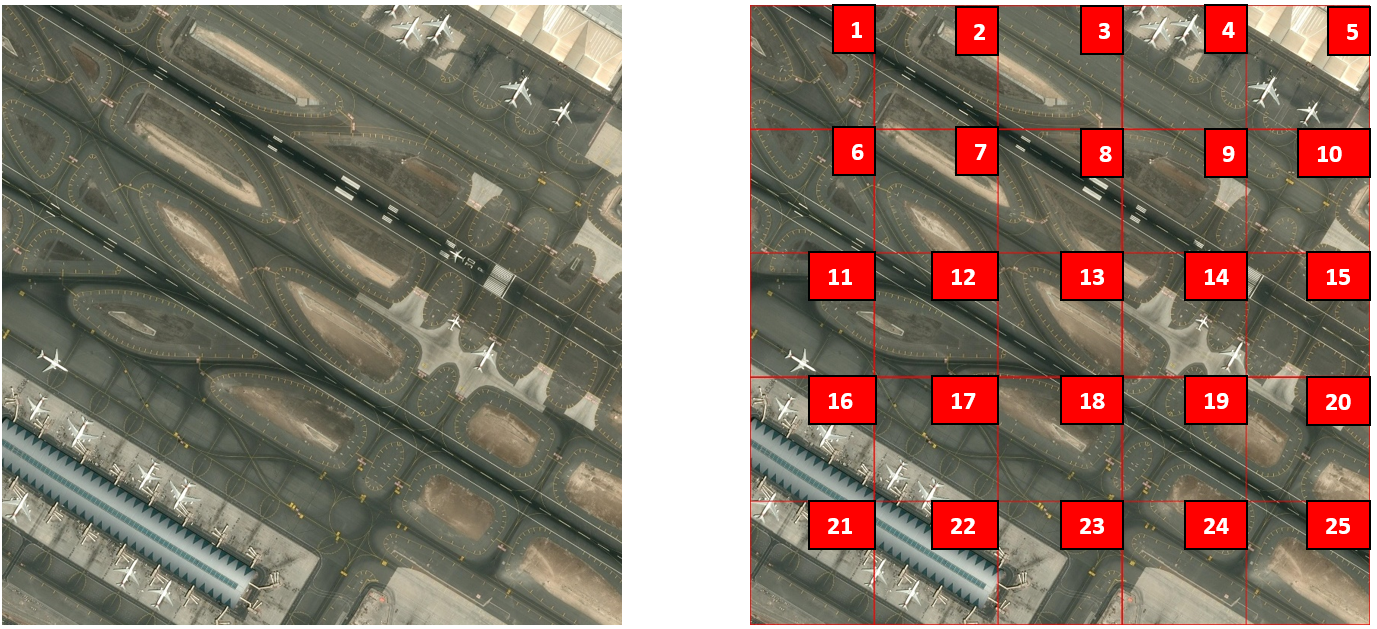


$N  Bloques = nblocks_x*nblocks_y$

$nblocks_x = \frac{x_size}{512}$ and $nblocks_y = \frac{y_size}{512}$

## Example of image dividing

In [ ]:
img = Image.open(folder_train+f'/{files_train[0]}')
# img = Image.open(folder_train+f'/4c9d2482-788c-4d68-a3d4-478b2367abce.jpg')
# img = Image.open(folder_train+f'/4c9d2482-788c-4d68-a3d4-478b2367abce.jpg')

new_size = 512/2

draw = ImageDraw.Draw(img)
x_size, y_size = img.size
nblocks_x = int(x_size/new_size)
nblocks_y = int(y_size/new_size)



for i in range(nblocks_x):
  for j in range(nblocks_y):
    points= [(i*new_size, j*new_size), ((i+1)*new_size, j*new_size), ((i+1)*new_size,(j+1)*new_size), (i*new_size, (j+1)*new_size)]
    draw.polygon(points, outline='red', width = 3)

# points = [(1539, 485), (2048, 485), (2048, 950), (1539, 950)]
# draw.polygon(points, outline='blue', width = 5)
# points = [(2151, 495+44), (2220, 495+44), (2220, 568+44), (2151, 568+44)]
# draw.polygon(points, outline='green', width = 3)
#points = [(1912, 2015), (2083, 2015), (2083, 2219), (1912, 2219), (1912, 2015)]
#draw.polygon(points, outline='red', width = 3)


display(img)


The following code is to make the subdivisions of the image.

En él se ven aviones que se encuentran cortados y esto no es un problema. Pero esta es una de las consecuencias de hacer este tipo de subdivisiones de imagenes, que produce que los aviones se encuentren partidos.
Para evitar o minimizar estos errores, se van a incluir más imagenes como consecuencia de esta, que serán imagenes en las que aparezcan estos aviones partidos.

# **Dividing images**

## Before dividind the images, YOLO configuration

Antes de realizar la división de las imagenes vamos a proceder con la creación de las carpetas de importancia y el fichero de configuración del fichero de YOLO

**Creacion de las carpetas** necesarias para YOLO, que incluye:
* carpeta de imagenes para train, valid y test
* carpeta de labels para train, valid y test

In [ ]:
build_YOLO_folders(path, 'archive/data_YOLO_256')

YOLO Folders created in /content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO_256


**Creacion del fichero de configuracion**

In [ ]:
path_data_store = 'data_YOLO_256'
name_classes = ['Airplane']
config_YOLO_file(path+'archive','config_YOLO_256.yaml', path_data_store, name_classes)

['names:\n  0: Airplane', '\nnc: 1', '\npath: /content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO_256', '\ntrain: images/train', '\nval: images/train']


'/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/config_YOLO_256.yaml'

## After creating YOLO files, dividing images and labeling

The dividing images is only going to be done for the training data

In [ ]:
path_YOLO_train = os.path.join(path, 'archive', path_data_store, 'images/train')
path_YOLO_train_labels = os.path.join(path, 'archive', path_data_store, 'labels/train')
YOLO_dividing_image(folder_train, df, new_size, path_YOLO_train, path_YOLO_train_labels)

100%|██████████| 93/93 [21:01<00:00, 13.57s/it]


0 0.511719 0.123047 0.199219 0.246094

0 0.150391 0.041016 0.265625 0.078125
[(212, 0), (314, 0), (314, 127), (212, 127)]
[(10, 2), (146, 2), (146, 42), (10, 42)]


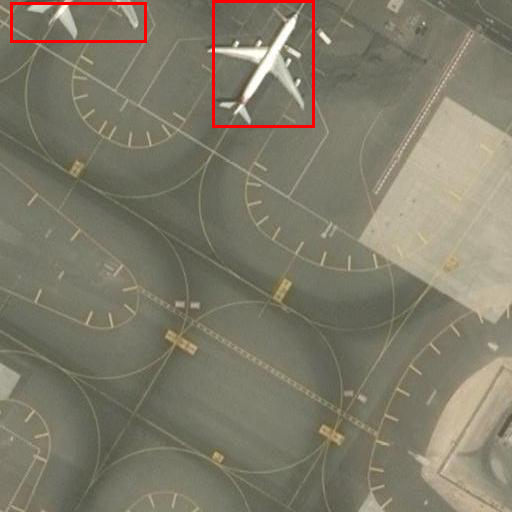

In [ ]:
# image_file_txt = path + 'archive/data_YOLO/labels/train/90c365f8-18b6-4230-be74-cd856a1ba98f_4.txt'
# image_file_txt = path + 'archive/data_YOLO/labels/train/2314c1b5-ec8f-4212-b42f-43365a13fd20_13.txt'
# image_file = path + 'archive/data_YOLO/images/train/2314c1b5-ec8f-4212-b42f-43365a13fd20_13.jpg'
# image_file = path + 'archive/data_YOLO/images/train/90c365f8-18b6-4230-be74-cd856a1ba98f_4.jpg'
image_names = []
list_images = os.listdir(path + 'archive/data_YOLO_256/images/train')
for image in list_images:
  if image.startswith('2314c1b5-ec8f-4212-b42f-43365a13fd20_13'):
    image_names.append(image)

for image in image_names:
  image_file = f'{path}archive/data_YOLO/images/train/{image}'
  image_file_txt = f'{path}archive/data_YOLO/labels/train/{image.replace(".jpg", ".txt")}'
  new_size =  512
  boxes = []

  # Reading the text file and extracting coordinates
  with open(image_file_txt, 'r') as file:
      for line in file:
          elements = line.split()
          print(line)
          if elements:
              _, x, y, w, h = [float(num) for num in elements]

              # Convert YOLO coordinates to rectangle coordinates
              x = x*new_size #Desnormalizing the values
              y = y*new_size #Desnormalizing the values
              w = w*new_size #Desnormalizing the values
              h = h*new_size #Desnormalizing the values
              rect_coords = yolo_to_rectangle((abs(x), abs(y), abs(w), abs(h)))
              boxes.append(rect_coords)

  # Open the image and draw rectangles
  img = Image.open(image_file)
  draw = ImageDraw.Draw(img)
  for points in boxes:
      rectangle = [(points[0], points[1]), (points[2], points[1]), (points[2], points[3]), (points[0], points[3])]
      print(rectangle)
      draw.polygon(rectangle, outline='red', width=3)

  # Display the image with drawn rectangles
  display(img)

In [ ]:
def delete_empty_txt_and_corresponding_images(source_folder, image_folder):
    """
    Moves .txt files with an empty first line from a source folder to a destination folder.

    Parameters:
    - source_folder (str): The path to the folder containing the .txt files.
    - destination_folder (str): The path to the folder where empty .txt files will be moved.
    """

    # Ensure the destination folder exists, create if not
    # Iterate over all files in the source folder
    for filename in os.listdir(source_folder):
        if filename.endswith('.txt'):  # Check if the file is a .txt file
            txt_file_path = os.path.join(source_folder, filename)  # Full path to the file
            n_lines = 0

            # Open the file and read the first line
            with open(txt_file_path, 'r') as file:
                for line in file:
                    n_lines +=1

            if n_lines == 0:
                os.remove(txt_file_path)
                print(f"Deleted empty .txt file: {filename}")

                # Construct the corresponding image file name and path
                image_filename = f"{os.path.splitext(filename)[0]}.jpg"
                image_file_path = os.path.join(image_folder, image_filename)

                # Check if the corresponding image file exists and delete it
                if os.path.exists(image_file_path):
                    os.remove(image_file_path)
                    print(f"Deleted corresponding image file: {image_filename}")



In [ ]:
delete_empty_txt_and_corresponding_images(path_YOLO_train_labels, path_YOLO_train)

Se han truncado las últimas 5000 líneas del flujo de salida.
Deleted empty .txt file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_21.txt
Deleted corresponding image file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_21.jpg
Deleted empty .txt file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_22.txt
Deleted corresponding image file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_22.jpg
Deleted empty .txt file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_23.txt
Deleted corresponding image file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_23.jpg
Deleted empty .txt file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_26.txt
Deleted corresponding image file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_26.jpg
Deleted empty .txt file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_28.txt
Deleted corresponding image file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_28.jpg
Deleted empty .txt file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_29.txt
Deleted corresponding image file: e18dde99-6efd-4c6a-8fd3-343e8a393cd8_29.jpg
Deleted empty .txt file: e18dde99-6efd-4c6a-8fd3-343e8a39

In [ ]:
len(os.listdir(path_YOLO_train_labels))

6753

## **Creating the folders for validation and test, where the images do not need to be croped**

In [ ]:
path_YOLO_valid = os.path.join(path, 'archive', path_data_store, 'images/valid')
path_YOLO_valid_labels = os.path.join(path, 'archive', path_data_store, 'labels/valid')
path_YOLO_test = os.path.join(path, 'archive', path_data_store, 'images/test')
path_YOLO_test_labels = os.path.join(path, 'archive', path_data_store, 'labels/test')

In [ ]:
path_YOLO_test

'/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO_256/images/test'

In [ ]:
YOLO_dividing_image(folder_valid, df, new_size, path_YOLO_valid, path_YOLO_valid_labels)

100%|██████████| 38/38 [08:18<00:00, 13.13s/it]


In [ ]:
YOLO_dividing_image(folder_test, df, new_size, path_YOLO_test, path_YOLO_test_labels)

100%|██████████| 19/19 [04:28<00:00, 14.12s/it]


In [ ]:
copy_files(folder_valid, path_YOLO_valid)
copy_files(folder_test, path_YOLO_test)

In [ ]:
for img_name in files_valid:
  label_img_val_test(df, path_YOLO_valid, img_name, path_YOLO_valid_labels)

/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/valid/4e9164aa-532e-4b76-bce4-060b090da357.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/valid/996ba764-cd2a-49c0-9c9f-b166207de0ab.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/valid/eeb978ec-5945-4def-819a-4ea903b17c2d.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/valid/a40b7aed-8db8-449d-b0e4-3debfa04281a.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/valid/140d04fd-dea7-4d46-bce2-e20f73e155da.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/valid/20bfce20-fb8a-4e20-a4aa-57064add848b.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/valid/22291e0b-ebe2-4f3f-b53e-4e709179300a.txt
/conte

In [ ]:
for img_name in files_test:
  label_img_val_test(df, path_YOLO_test, img_name, path_YOLO_test_labels)

/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/test/cbd51501-ed0f-411c-b472-df4357cca40c.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/test/fc1ab8ce-e531-46ed-b74b-0374cd58cf2a.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/test/57af3c0a-b5ae-4e4f-a7f9-6856be2f80e5.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/test/27cd32ba-c86a-419f-b544-601dd67c5d36.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/test/5f726a3d-9876-498f-90c5-9f9efae06c6a.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/test/696b9320-7dbe-4c28-bd07-7a73e7a28e64.txt
/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/test/ae2fddcd-a2b4-4f32-b86d-ac2c2b03d77d.txt
/content/driv

In [ ]:
delete_empty_txt_and_corresponding_images(path_YOLO_test_labels, path_YOLO_test)
delete_empty_txt_and_corresponding_images(path_YOLO_valid_labels, path_YOLO_valid)

'/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/'

In [ ]:
import zipfile
import os

# Path to the folder that needs to be zipped
folder_path = '/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO_256'

# Path for the output zip file
zip_file_path = 'Airbus_YOLO.zip'

# Create a ZipFile object in WRITE mode
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Walk through directory
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Create a relative path for files to keep the directory structure
            relative_path = os.path.relpath(os.path.join(root, file), os.path.join(folder_path, '..'))
            zipf.write(os.path.join(root, file), relative_path)

# Verify if file was created successfully
os.path.exists(zip_file_path)


True

#**Converting to PASCAL**

In [ ]:
def extract_labels_name(folder):
  # Name of all the files that are inside the folder images
  files_names = []

  for files in os.listdir(folder):
    complete_path = os.path.join(folder, files)
    if os.path.isfile(complete_path):
      files_names.append(files)
  return files_names

In [ ]:
import os
import pandas as pd


def yolo_to_pandas_df(yolo_folder, new_size):
    data = []

    # Iterar sobre cada archivo en el directorio de anotaciones YOLO
    for filename in os.listdir(yolo_folder):
        if filename.endswith(".txt"):
            image_name = filename.replace(".txt", ".jpg")  # Asume que las imágenes son .jpg

            # Abrir y procesar cada archivo YOLO
            yolo_path = os.path.join(yolo_folder, filename)
            with open(yolo_path, 'r') as file:
                for line in file:
                    parts = line.strip().split()
                    obj_class, x_center, y_center, width, height = map(float, parts)

                    xmin = (x_center - width / 2) * new_size
                    ymin = (y_center - height / 2) * new_size
                    xmax = (x_center + width / 2) * new_size
                    ymax = (y_center + height / 2) * new_size

                    xmin = 0 if xmin < 0 else xmin
                    ymin = 0 if ymin < 0 else ymin
                    xmax = new_size if xmax>new_size else xmax
                    ymax = new_size if ymax>new_size else ymax
                    data.append([image_name, xmin, ymin, xmax, ymax])

    # Crear DataFrame con los datos acumulados
    df = pd.DataFrame(data, columns=['image', 'xmin', 'ymin', 'xmax', 'ymax'])
    return df

# Ejemplo de uso
df_train = yolo_to_pandas_df(path_YOLO_train_labels, 512)
df_test = yolo_to_pandas_df(path_YOLO_test_labels, 2560)
df_valid = yolo_to_pandas_df(path_YOLO_valid_labels, 2560)



In [ ]:
df_train.to_csv(os.path.join(path, 'archive/data_YOLO/train.csv'), index=False)
df_test.to_csv(os.path.join(path, 'archive/data_YOLO/test.csv'), index=False)
df_valid.to_csv(os.path.join(path, 'archive/data_YOLO/valid.csv'), index=False)

#*Converting to COCO Format*

In [ ]:
path_YOLO_train_labels

'/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO/labels/train'

In [ ]:
import os
import json
from tqdm import tqdm

# Configuración inicial

def YOLO_to_COCO_labels(path_to_labels, path_to_images, json_file):
  images_info = []  # Aquí debes añadir diccionarios con la info de cada imagen
  annotations = []
  categories = [{"id": 0, "name": "Airplane"}]  # Ejemplo de categorías
  image_id = 0
  annotation_id = 0

  info = {
      "description": "",
      "url": "",
      "version": "",
      "year": 2020,
      "contributor": "",
      "date_created": "2020-12-09"
  }
  licenses = [{"id": 1, "name": None, "url": None}]
  image_files = [f for f in os.listdir(path_to_images) if f.lower().endswith(".jpg")]

  # Leer todos los archivos .txt en la carpeta de etiquetas
  for filename in tqdm(image_files, desc="Processing images"):
      if filename.lower().endswith(".jpg"):
          # Supongamos que las dimensiones de las imágenes son conocidas o se leen aquí
          width, height = 512, 512  # Ejemplo de dimensiones
          file_path = os.path.join(path_to_images, filename)
          images_info.append({
              "id": image_id,
              "file_name": filename,
              "width": width,
              "height": height,
              "date_captured": "2020-12-09",
              "license": 1,
              "coco_url": "",
              "flickr_url": ""
          })

          label_file = os.path.join(path_to_labels, filename.replace('.jpg', '.txt'))
          if os.path.exists(label_file):
              with open(label_file, 'r') as file:
                  lines = file.read().splitlines()
                  for line in lines:
                      class_id, x_center, y_center, width_norm, height_norm = map(float, line.split())
                      x_min = (x_center - width_norm / 2) * width
                      y_min = (y_center - height_norm / 2) * height
                      width_bbox = width_norm * width
                      height_bbox = height_norm * height

                      annotations.append({
                          "id": annotation_id,
                          "image_id": image_id,
                          "category_id": int(class_id),
                          "bbox": [x_min, y_min, width_bbox, height_bbox],
                          "area": width_bbox * height_bbox,
                          "iscrowd": 0
                      })
                      annotation_id += 1
          image_id += 1

  # Crear el archivo JSON
  coco_format = {
      "info": info,
      "licenses": licenses,
      "images": images_info,
      "annotations": annotations,
      "categories": categories
  }

  with open(json_file, 'w') as f:
      json.dump(coco_format, f)

In [ ]:
path

'/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/'

In [ ]:
path_to_labels = path_YOLO_train_labels  # Carpeta con archivos .txt
path_to_images = path_YOLO_train  # Carpeta con archivos .txt
json_file = f'{path}/archive/data_YOLO/instances_train.json'
YOLO_to_COCO_labels(path_to_labels, path_to_images, json_file)

Processing images: 100%|██████████| 2399/2399 [00:11<00:00, 217.53it/s]


In [ ]:
path_to_labels = path_YOLO_test_labels  # Carpeta con archivos .txt
path_to_images = path_YOLO_test  # Carpeta con archivos .txt
json_file = f'{path}/archive/data_YOLO/instances_test.json'
YOLO_to_COCO_labels(path_to_labels, path_to_images, json_file)

Processing images: 100%|██████████| 847/847 [00:01<00:00, 430.56it/s]


In [ ]:
path_to_labels = path_YOLO_valid_labels  # Carpeta con archivos .txt
path_to_images = path_YOLO_valid  # Carpeta con archivos .txt
json_file = f'{path}/archive/data_YOLO/instances_valid.json'
YOLO_to_COCO_labels(path_to_labels, path_to_images, json_file)

Processing images: 100%|██████████| 878/878 [00:03<00:00, 235.66it/s]


# Considering truncated Airplanes


In [ ]:
build_YOLO_folders(path, 'archive/data_YOLO_Truncated_airplane')

YOLO Folders created in /content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO_Truncated_airplane


In [ ]:
path_data_store = 'data_YOLO_Truncated_airplane'
name_classes = ['Airplane', 'Truncated_airplane']
config_YOLO_file_truncated_airplane(path+'archive','config_YOLO_Truncated_airplane.yaml', path_data_store, name_classes)

'/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/config_YOLO_Truncated_airplane.yaml'

In [ ]:
path_YOLO_train = os.path.join(path, 'archive', path_data_store, 'images/train')
path_YOLO_train_labels = os.path.join(path, 'archive', path_data_store, 'labels/train')
YOLO_dividing_image_truncated_airplane(folder_train, df, 512, path_YOLO_train, path_YOLO_train_labels)

140d04fd-dea7-4d46-bce2-e20f73e155da.jpg
fc06c595-7905-46c3-91c0-daf56af0f926.jpg
534ba32c-cde2-402b-9b47-1396cf0999e8.jpg
d3d2b706-9017-41f4-b57e-469038daa634.jpg
d8873734-016a-4b9d-9b9e-8bc47eb13fef.jpg
e18dde99-6efd-4c6a-8fd3-343e8a393cd8.jpg
34ae857d-6e71-46b9-b694-d9e40fb093bc.jpg
e9021b38-0b3c-484f-af2c-b36bbf765f85.jpg
2314c1b5-ec8f-4212-b42f-43365a13fd20.jpg
4a0821b7-3689-4b0e-9397-389254ea9a32.jpg
eeb3f271-15f5-4977-a921-f4636efc6434.jpg
5c9e817a-dc4b-42ab-952c-3128e2de12e8.jpg
f34f05c6-84ce-47d7-ba5c-394d85c86a46.jpg
cc4f3226-c262-409e-a4b2-a576e776f7f4.jpg
11928d1c-44c7-4d3d-b593-9cdfd5f6f367.jpg


In [ ]:
path_YOLO_valid = os.path.join(path, 'archive', path_data_store, 'images/valid')
path_YOLO_valid_labels = os.path.join(path, 'archive', path_data_store, 'labels/valid')
path_YOLO_test = os.path.join(path, 'archive', path_data_store, 'images/test')
path_YOLO_test_labels = os.path.join(path, 'archive', path_data_store, 'labels/test')

In [ ]:
copy_files(folder_valid, path_YOLO_valid)
copy_files(folder_test, path_YOLO_test)

In [ ]:
for img_name in files_valid:
  label_img_val_test_truncated_airplane(df, path_YOLO_valid, img_name, path_YOLO_valid_labels)

In [ ]:
for img_name in files_test:
  label_img_val_test_truncated_airplane(df, path_YOLO_test, img_name, path_YOLO_test_labels)

/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/archive/data_YOLO_Truncated_airplane/labels/test/57af3c0a-b5ae-4e4f-a7f9-6856be2f80e5.txt


ValueError: ('Lengths must match to compare', (3425,), (5, 2))

'/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft/'

In [ ]:
import shutil

def convert_folder_to_zip(folder_path, zip_filename):
  """Converts a folder to a ZIP archive using shutil.make_archive.

  Args:
      folder_path (str): The path to the folder to convert.
      zip_filename (str): The desired filename for the ZIP archive.
  """

  try:
    shutil.make_archive(zip_filename, 'zip', folder_path)
    print(f"Folder '{folder_path}' successfully converted to '{zip_filename}.zip'")
  except Exception as e:
    print(f"An error occurred: {e}")

# Example usage
folder_to_convert =f'{path}/archive/data_YOLO'
desired_zip_name = "Airbus"
convert_folder_to_zip(folder_to_convert, desired_zip_name)


Folder '/content/drive/Othercomputers/Mi portátil (1)/TFM/Code/AirbusAircraft//archive/data_YOLO' successfully converted to 'Airbus.zip'
